# Importing All Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [3]:
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# Data Preprocessing Techniques

    Missing values
    Data Cleaning
    Extract Features
    Feature Encoding
    Label Encoding
    Handle Outliers
    Separate Independent and dependent Features
    then Select best Feature

# Data Exploration

Data exploration is a key aspect of data analysis and model building. Without spending significant time on understanding the data and its patterns one cannot expect to build efficient predictive models. Data exploration takes major chunk of time in a data science project comprising of data cleaning and preprocessing

# Missing values

In [5]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

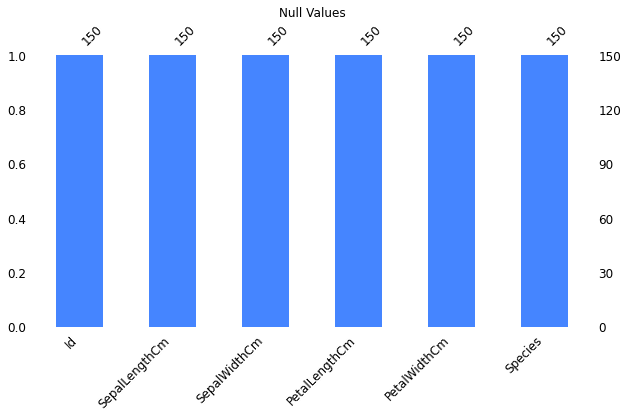

In [6]:
import missingno as no
no.bar(iris,figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0))
plt.title("Null Values")
plt.show()

# Full summary of the dataframe

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Statistical details of the dataset

In [9]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Shape of dataset

In [10]:
iris.shape

(150, 6)

# Find the dtypes in the Dataset

In [11]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

# Finding all the column names inside the dataset

In [12]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Function return Series with number of distinct observations over requested axis

In [13]:
iris.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

# Find the correlation of dataset

In [14]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


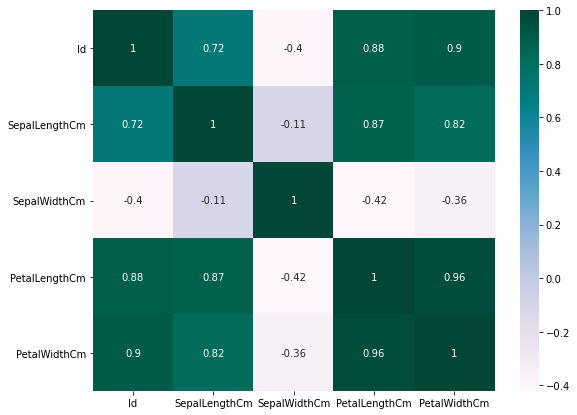

In [15]:
plt.figure(figsize=(9,7))
sns.heatmap(iris.corr(),annot=True,cmap='PuBuGn')
plt.show()

# Find the covariance of dataset

In [16]:
iris.cov()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1887.500000,25.782886,-7.492282,67.667785,29.832215
SepalLengthCm,25.782886,0.685694,-0.039268,1.273682,0.516904
SepalWidthCm,-7.492282,-0.039268,0.188004,-0.321713,-0.117981
PetalLengthCm,67.667785,1.273682,-0.321713,3.113179,1.296387
PetalWidthCm,29.832215,0.516904,-0.117981,1.296387,0.582414


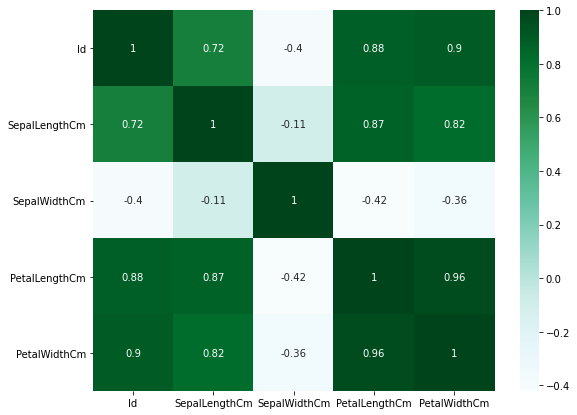

In [17]:
plt.figure(figsize=(9,7))
sns.heatmap(iris.corr(),annot=True,cmap='BuGn')
plt.show()

# LabelEncoder

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
Label_encoder = LabelEncoder()

In [20]:
iris.Species = Label_encoder.fit_transform(iris.Species)

In [21]:
iris.Species.unique()

array([0, 1, 2])

In [22]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


# Separate out your Independent feature & Dependent feature

In [23]:
x = iris.drop("Species",axis=1)
y = iris["Species"]

# Splitting Dataset into Training and Testing set

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=3)

In [25]:
clf = DecisionTreeClassifier()

In [26]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [27]:
from sklearn.metrics import accuracy_score

In [29]:
y_pred = clf.predict(xtest)

In [43]:
y_pred

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0])

In [30]:
print("Accuracy = ",accuracy_score(ytest,y_pred))

Accuracy =  1.0


In [44]:
print('Accuracy:', clf.score(xtest, ytest)*100)

Accuracy: 100.0


# Confusion matrix

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
cm = confusion_matrix(ytest,y_pred)

In [33]:
cm

array([[15,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 11]], dtype=int64)

In [34]:
from sklearn import tree

[Text(200.88000000000002, 181.2, 'X[0] <= 100.5\ngini = 0.666\nsamples = 112\nvalue = [35, 38, 39]'),
 Text(133.92000000000002, 108.72, 'X[0] <= 50.5\ngini = 0.499\nsamples = 73\nvalue = [35, 38, 0]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]')]

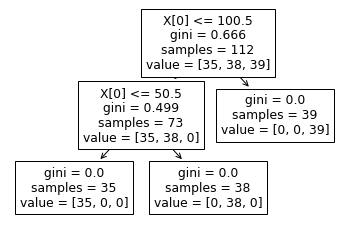

In [35]:
tree.plot_tree(clf)

In [36]:
text_represent = tree.export_text(clf)

In [37]:
print(text_represent)

|--- feature_0 <= 100.50
|   |--- feature_0 <= 50.50
|   |   |--- class: 0
|   |--- feature_0 >  50.50
|   |   |--- class: 1
|--- feature_0 >  100.50
|   |--- class: 2



In [38]:
plt.savefig('tree.png',format='png',bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [39]:
tree.export_graphviz(clf)

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[0] <= 100.5\\ngini = 0.666\\nsamples = 112\\nvalue = [35, 38, 39]"] ;\n1 [label="X[0] <= 50.5\\ngini = 0.499\\nsamples = 73\\nvalue = [35, 38, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 35\\nvalue = [35, 0, 0]"] ;\n1 -> 2 ;\n3 [label="gini = 0.0\\nsamples = 38\\nvalue = [0, 38, 0]"] ;\n1 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 39\\nvalue = [0, 0, 39]"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n}'

# Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [40]:
from sklearn.metrics import r2_score, mean_squared_error
print("Accuracy is: ", r2_score(ytest,y_pred))

Accuracy is:  1.0


In [41]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(ytest, y_pred)) 

Mean Absolute Error: 0.0


In [42]:
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred)) 

Mean Squared Error: 0.0


In [ ]:
#prediction
x = [[6.4,1.7,6.6,2.2]]
y_predi = clf.predict(x)
print(y_predi)